In [1]:
# Import required required libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf

In [4]:
# Read data into pandas libraries
df = pd.read_csv('HW4-data.csv')
data = df[['MinorityPop', 'FireReport', 'CrimeRate', 'HouseAge', 'Income', 'Declination']]
data.head()

,MinorityPop,FireReport,CrimeRate,HouseAge,Income,Declination
0,54.0,34.1,68.0,52.6,82.31,0.30
1,4.9,11.0,75.0,42.6,214.80,0.02
2,7.1,6.9,18.0,78.5,111.04,0.02
3,5.3,7.3,31.0,90.1,106.94,0.40
4,21.5,15.1,25.0,89.8,96.31,1.10


In [3]:
X = data[['MinorityPop', 'FireReport', 'CrimeRate', 'HouseAge', 'Income']]

In [5]:
X.head()

,MinorityPop,FireReport,CrimeRate,HouseAge,Income
0,54.0,34.1,68.0,52.6,82.31
1,4.9,11.0,75.0,42.6,214.80
2,7.1,6.9,18.0,78.5,111.04
3,5.3,7.3,31.0,90.1,106.94
4,21.5,15.1,25.0,89.8,96.31


In [6]:
#step1: Standardizing the input variables to remove centering and scaling issues
X_tr_norm = (X - X.mean())/X.std()
X_tr_norm.head()

,MinorityPop,FireReport,CrimeRate,HouseAge,Income
0,0.608127,2.414121,1.659687,-0.264709,-0.719480
1,-0.937692,-0.085484,1.982315,-0.694152,2.589366
2,-0.868430,-0.529137,-0.644794,0.847549,-0.001968
3,-0.925099,-0.485854,-0.045629,1.345703,-0.104363
4,-0.415073,0.358168,-0.322166,1.332819,-0.369840


In [17]:
#step 2: Find the Principal Components that reflects 90% of the variance
# Create a PCA
pca = PCA(n_components=.90) # Defines the parameters for the PCA

pca = pca.fit(X_tr_norm) # Fit a PCA for the standardized data

PC_tr = pca.transform(X_tr_norm) # Evaluate the principal components for the standardized data

PC_tr = pd.DataFrame(PC_tr)
PC_tr.head()

,0,1,2,3
0,2.356080,1.431607,0.840887,-0.728768
1,-1.253286,3.146455,-0.067260,0.704535
2,-0.538300,-0.586635,-1.217110,0.152717
3,-0.063336,-0.231863,-1.677547,0.198348
4,0.617935,-0.496733,-1.169869,0.261512


In [9]:
# Required the first 4 principal components to acheive 0.9 covariance knowledge.

In [11]:
cov = np.cov(X_tr_norm.T)
eig_val, eig_vec = np.linalg.eig(cov)
print('Eigenvalues = ', eig_val)
print('Eigenvectors = ', eig_vec)


Eigenvalues =  [2.72181341 0.89233097 0.76177923 0.32004303 0.30403337]
Eigenvectors =  [[ 0.44364562  0.2316404  -0.63589588  0.46310257 -0.36151588]
 [ 0.51644207 -0.23469755 -0.20208193 -0.03211203  0.79770694]
 [ 0.36704121 -0.78803679  0.09826979 -0.17507468 -0.45163113]
 [ 0.42000529  0.18232794  0.73286348  0.50310073 -0.01236348]
 [-0.47470249 -0.48684117 -0.08974131  0.7076322   0.16984222]]


In [20]:
# Pricipal Component analysis based on all features
all_pca = PCA() # Defines the parameters for the PCA

all_pca = all_pca.fit(X_tr_norm) # Fit a PCA for the standardized data

pca_tr = all_pca.transform(X_tr_norm) # Evaluate the principal components for the standardized data

all_pca = pd.DataFrame(pca_tr)
all_pca.head()

,0,1,2,3,4
0,2.356080,1.431607,0.840887,-0.728768,0.837421
1,-1.253286,3.146455,-0.067260,0.704535,-0.176110
2,-0.538300,-0.586635,-1.217110,0.152717,0.172251
3,-0.063336,-0.231863,-1.677547,0.198348,-0.066886
4,0.617935,-0.496733,-1.169869,0.261512,0.501977


In [28]:
#Renaming all column fields into corresponding PCs
all_pca.rename(columns={0:'pc1',1:'pc2',2:'pc3',3:'pc4',4:'pc5'}, inplace=True)
all_pca.head()

,pc1,pc2,pc3,pc4,pc5
0,2.356080,1.431607,0.840887,-0.728768,0.837421
1,-1.253286,3.146455,-0.067260,0.704535,-0.176110
2,-0.538300,-0.586635,-1.217110,0.152717,0.172251
3,-0.063336,-0.231863,-1.677547,0.198348,-0.066886
4,0.617935,-0.496733,-1.169869,0.261512,0.501977


In [29]:
# Declaring y as the target varibale
y = data['Declination']

In [30]:
# Step 3: Construct an Ordinary Least Squares Model based on all the principal components

In [31]:
# Fit a Regression Model based on all PCs 
all_pca_sm = sm.add_constant(all_pca)

In [32]:
all_pca_sm.head()

,const,pc1,pc2,pc3,pc4,pc5
0,1.0,2.356080,1.431607,0.840887,-0.728768,0.837421
1,1.0,-1.253286,3.146455,-0.067260,0.704535,-0.176110
2,1.0,-0.538300,-0.586635,-1.217110,0.152717,0.172251
3,1.0,-0.063336,-0.231863,-1.677547,0.198348,-0.066886
4,1.0,0.617935,-0.496733,-1.169869,0.261512,0.501977


In [33]:
# Fitting the OLS resgression model 
lr = sm.OLS(y,all_pca_sm).fit()

# Printing the parameters
lr.params

const    0.624400
pc1      0.265833
pc2     -0.165388
pc3      0.157529
pc4      0.158984
pc5      0.242389
dtype: float64

In [27]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Declination   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     18.96
Date:                Thu, 19 Jan 2023   Prob (F-statistic):           5.19e-10
Time:                        19:52:34   Log-Likelihood:                -17.735
No. Observations:                  50   AIC:                             47.47
Df Residuals:                      44   BIC:                             58.94
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6244      0.052     12.006      0.000       0.520       0.729
0              0.2658      0.032      8.348      0.000       0.202       0.330
1             -0.1654      0.056     -2.974      0.005      -0.277      -0.053
2              0.1575      0.060      2.617      0.012       0.036       0.279
3              0.1590      0.093      1.712      0.094      -0.028       0.346
4              0.2424      0.095      2.544      0.015       0.050       0.434
==============================================================================
Omnibus:                        4.727   Durbin-Watson:                   1.632
Prob(Omnibus):                  0.094   Jarque-Bera (JB):                4.115
Skew:                           0.388   Prob(JB):                        0.128
Kurtosis:                       4.172   Cond. No.                         2.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
# Step 4:  Construct a stepwise linear model based on all the principal components with the AIC metric
residuals = []    
def backwardSelection(X, y, model_type ="linear",elimination_criteria = "aic", varchar_process = "dummy_dropfirst", sl=0.05):
    """
    Backward Selection is a function, based on regression models, that returns significant features and selection iterations.\n
    Required Libraries: pandas, numpy, statmodels
    
    Parameters
    ----------
    X : Independent variables (Pandas Dataframe)\n
    y : Dependent variable (Pandas Series, Pandas Dataframe)\n
    model_type : 'linear' or 'logistic'\n
    elimination_criteria : 'aic', 'bic', 'r2', 'adjr2' or None\n
        'aic' refers Akaike information criterion\n
        'bic' refers Bayesian information criterion\n
        'r2' refers R-squared (Only works on linear model type)\n
        'r2' refers Adjusted R-squared (Only works on linear model type)\n
    varchar_process : 'drop', 'dummy' or 'dummy_dropfirst'\n
        'drop' drops varchar features\n
        'dummy' creates dummies for all levels of all varchars\n
        'dummy_dropfirst' creates dummies for all levels of all varchars, and drops first levels\n
    sl : Significance Level (default: 0.05)\n
    

    Returns
    -------
    columns(list), iteration_logs(str)\n\n
    Not Returns a Model
    

    Tested On
    ---------
    Python v3.6.7, Pandas v0.23.4, Numpy v1.15.04, StatModels v0.9.0
    

    See Also
    --------
    https://en.wikipedia.org/wiki/Stepwise_regression    
    """
    X = __varcharProcessing__(X,varchar_process = varchar_process)
    return __backwardSelectionRaw__(X, y, model_type = model_type,elimination_criteria = elimination_criteria , sl=sl)

def __varcharProcessing__(X, varchar_process = "dummy_dropfirst"):
    
    dtypes = X.dtypes
    if varchar_process == "drop":   
        X = X.drop(columns = dtypes[dtypes == np.object].index.tolist())
        print("Character Variables (Dropped):", dtypes[dtypes == np.object].index.tolist())
    elif varchar_process == "dummy":
        X = pd.get_dummies(X,drop_first=False)
        print("Character Variables (Dummies Generated):", dtypes[dtypes == np.object].index.tolist())
    elif varchar_process == "dummy_dropfirst":
        X = pd.get_dummies(X,drop_first=True)
        print("Character Variables (Dummies Generated, First Dummies Dropped):", dtypes[dtypes == np.object].index.tolist())
    else: 
        X = pd.get_dummies(X,drop_first=True)
        print("Character Variables (Dummies Generated, First Dummies Dropped):", dtypes[dtypes == np.object].index.tolist())
    
    X["intercept"] = 1
    cols = X.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    X = X[cols]
    
    return X

def __backwardSelectionRaw__(X, y, model_type ="linear",elimination_criteria = "aic", sl=0.05):
    
    iterations_log = ""
    last_eleminated = ""    
    cols = X.columns.tolist()

    def regressor(y,X, model_type=model_type):
        if model_type =="linear":
            regressor = sm.OLS(y, X).fit()
        elif model_type == "logistic":
            regressor = sm.Logit(y, X).fit()
        else:
            print("\nWrong Model Type : "+ model_type +"\nLinear model type is seleted.")
            model_type = "linear"
            regressor = sm.OLS(y, X).fit()
        return regressor
    for i in range(X.shape[1]):
        if i != 0 :          
            if elimination_criteria == "aic":
                criteria = model.aic
                new_model = regressor(y,X)
                new_criteria = new_model.aic
                if criteria < new_criteria:
                    print("Regained : ", last_eleminated)
                    iterations_log += "\n"+str(new_model.summary())+"\nAIC: "+ str(new_model.aic) + "\nBIC: "+ str(new_model.bic)+"\n"
                    iterations_log += str("\n\nRegained : "+last_eleminated + "\n\n")
                    break  
            elif elimination_criteria == "bic":
                criteria = model.bic
                new_model = regressor(y,X)
                new_criteria = new_model.bic
                if criteria < new_criteria:
                    print("Regained : ", last_eleminated)
                    iterations_log += "\n"+str(new_model.summary())+"\nAIC: "+ str(new_model.aic) + "\nBIC: "+ str(new_model.bic)+"\n"
                    iterations_log += str("\n\nRegained : "+last_eleminated + "\n\n")
                    break  
            elif elimination_criteria == "adjr2" and model_type =="linear":
                criteria = model.rsquared_adj
                new_model = regressor(y,X)
                new_criteria = new_model.rsquared_adj
                if criteria > new_criteria:
                    print("Regained : ", last_eleminated)
                    iterations_log += "\n"+str(new_model.summary())+"\nAIC: "+ str(new_model.aic) + "\nBIC: "+ str(new_model.bic)+"\n"
                    iterations_log += str("\n\nRegained : "+last_eleminated + "\n\n")
                    break  
            elif elimination_criteria == "r2" and model_type =="linear":
                criteria = model.rsquared
                new_model = regressor(y,X)
                new_criteria = new_model.rsquared
                if criteria > new_criteria:
                    print("Regained : ", last_eleminated)
                    iterations_log += "\n"+str(new_model.summary())+"\nAIC: "+ str(new_model.aic) + "\nBIC: "+ str(new_model.bic)+"\n"
                    iterations_log += str("\n\nRegained : "+last_eleminated + "\n\n")
                    break   
            else: 
                new_model = regressor(y,X)
            model = new_model
            iterations_log += "\n"+str(model.summary())+"\nAIC: "+ str(model.aic) + "\nBIC: "+ str(model.bic)+"\n"
        else:
            model = regressor(y,X)
            iterations_log += "\n"+str(model.summary())+"\nAIC: "+ str(model.aic) + "\nBIC: "+ str(model.bic)+"\n"
        maxPval = max(model.pvalues.values[1:])
        cols = X.columns.tolist()
        if maxPval > sl:
            for j in cols:
                if (model.pvalues[j] == maxPval):
                    print("Eliminated :" ,j)
                    iterations_log += str("\n\nEliminated : "+j+ "\n\n")
                    
                    del X[j]
                    last_eleminated = j
        else:
            break
    residuals.append(model.resid)
    print(str(model.summary())+"\nAIC: "+ str(model.aic) + "\nBIC: "+ str(model.bic))
    print("Final Variables:", cols)
    
    iterations_log += "\n"+str(model.summary())+"\nAIC: "+ str(model.aic) + "\nBIC: "+ str(model.bic)+"\n"
    
    return cols, iterations_log

In [90]:
model = backwardSelection(all_pca_sm,y,elimination_criteria = "aic")

Character Variables (Dummies Generated, First Dummies Dropped): []
Eliminated : pc4
Regained :  pc4
                            OLS Regression Results                            
Dep. Variable:            Declination   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     18.96
Date:                Sat, 21 Jan 2023   Prob (F-statistic):           5.19e-10
Time:                        19:47:56   Log-Likelihood:                -17.735
No. Observations:                  50   AIC:                             47.47
Df Residuals:                      44   BIC:                             58.94
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

C:\Users\haddy\AppData\Local\Temp\ipykernel_13368\485911428.py:54: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print("Character Variables (Dummies Generated, First Dummies Dropped):", dtypes[dtypes == np.object].index.tolist())


In [48]:
# below shows residuals vs target plot from the Stepwise models

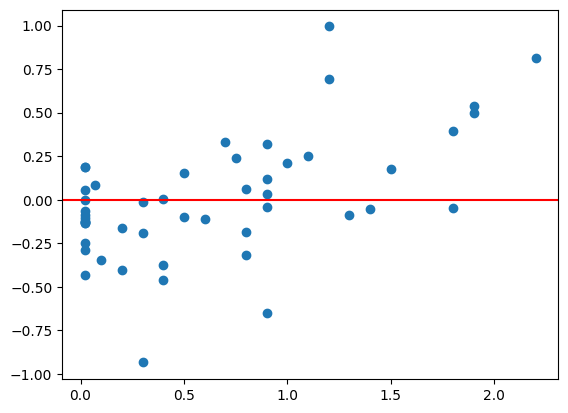

In [91]:
import matplotlib.pyplot as plt
plt.scatter(y, residuals)
plt.axhline(y=0.0, color='r', linestyle='-')
plt.show()

In [50]:
# Step 5 Boxcox transformation results
# box-transformation = ((taregt**0.5)-1)/0.5
from scipy.special import boxcox, inv_boxcox
box_tr_y = boxcox(data['Declination'], 0.5)

In [51]:
# Fitting the resgression model using 'OLS' box-transformation
box_lr = sm.OLS(box_tr_y,all_pca_sm).fit()

# Printing the parameters
box_lr.params

const   -0.673342
pc1      0.401819
pc2     -0.217881
pc3      0.198531
pc4      0.210668
pc5      0.193064
dtype: float64

In [52]:
box_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Declination   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     21.97
Date:                Sat, 21 Jan 2023   Prob (F-statistic):           5.72e-11
Time:                        18:44:25   Log-Likelihood:                -32.043
No. Observations:                  50   AIC:                             76.09
Df Residuals:                      44   BIC:                             87.56
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6733      0.069     -9.725      0.000      -0.813      -0.534
pc1            0.4018      0.042      9.478      0.000       0.316       0.487
pc2           -0.2179      0.074     -2.943      0.005      -0.367      -0.069
pc3            0.1985      0.080      2.477      0.017       0.037       0.360
pc4            0.2107      0.124      1.704      0.095      -0.039       0.460
pc5            0.1931      0.127      1.522      0.135      -0.063       0.449
==============================================================================
Omnibus:                        3.193   Durbin-Watson:                   1.355
Prob(Omnibus):                  0.203   Jarque-Bera (JB):                2.162
Skew:                           0.389   Prob(JB):                        0.339
Kurtosis:                       3.658   Cond. No.                         2.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

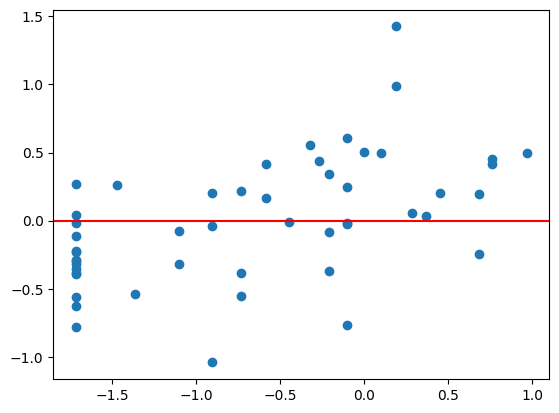

In [87]:
res = box_lr.resid
import matplotlib.pyplot as plt
plt.scatter(box_tr_y, res)
plt.axhline(y=0.0, color='r', linestyle='-')
plt.show()

In [54]:

# mse = np.square(res).mean()
# rmse = np.sqrt(mse)
# np.sqrt(np.square(res).mean())
#w = 1/np.abs(res)
#w

In [56]:
#Step 6  Run stepwise model with the full model to include polynomial interactions with box-cox
#transformation from step 5
all_pc_int = all_pca.copy()

In [57]:
all_pc_int['pc1pc2'] = all_pca['pc1']*all_pca['pc2']
all_pc_int['pc1pc3'] = all_pca['pc1']*all_pca['pc3']
all_pc_int.head()

,pc1,pc2,pc3,pc4,pc5,pc1pc2,pc1pc3
0,2.356080,1.431607,0.840887,-0.728768,0.837421,3.372982,1.981197
1,-1.253286,3.146455,-0.067260,0.704535,-0.176110,-3.943407,0.084296
2,-0.538300,-0.586635,-1.217110,0.152717,0.172251,0.315786,0.655171
3,-0.063336,-0.231863,-1.677547,0.198348,-0.066886,0.014685,0.106249
4,0.617935,-0.496733,-1.169869,0.261512,0.501977,-0.306949,-0.722903


In [67]:
# Stepwise model with polynomial interactions
resid_wit_int = []    
def backwardSelection(X, y, model_type ="linear",elimination_criteria = "aic", varchar_process = "dummy_dropfirst", sl=0.05):
    """
    Backward Selection is a function, based on regression models, that returns significant features and selection iterations.\n
    Required Libraries: pandas, numpy, statmodels
    
    Parameters
    ----------
    X : Independent variables (Pandas Dataframe)\n
    y : Dependent variable (Pandas Series, Pandas Dataframe)\n
    model_type : 'linear' or 'logistic'\n
    elimination_criteria : 'aic', 'bic', 'r2', 'adjr2' or None\n
        'aic' refers Akaike information criterion\n
        'bic' refers Bayesian information criterion\n
        'r2' refers R-squared (Only works on linear model type)\n
        'r2' refers Adjusted R-squared (Only works on linear model type)\n
    varchar_process : 'drop', 'dummy' or 'dummy_dropfirst'\n
        'drop' drops varchar features\n
        'dummy' creates dummies for all levels of all varchars\n
        'dummy_dropfirst' creates dummies for all levels of all varchars, and drops first levels\n
    sl : Significance Level (default: 0.05)\n
    

    Returns
    -------
    columns(list), iteration_logs(str)\n\n
    Not Returns a Model
    

    Tested On
    ---------
    Python v3.6.7, Pandas v0.23.4, Numpy v1.15.04, StatModels v0.9.0
    

    See Also
    --------
    https://en.wikipedia.org/wiki/Stepwise_regression    
    """
    X = __varcharProcessing__(X,varchar_process = varchar_process)
    return __backwardSelectionRaw__(X, y, model_type = model_type,elimination_criteria = elimination_criteria , sl=sl)

def __varcharProcessing__(X, varchar_process = "dummy_dropfirst"):
    
    dtypes = X.dtypes
    if varchar_process == "drop":   
        X = X.drop(columns = dtypes[dtypes == np.object].index.tolist())
        print("Character Variables (Dropped):", dtypes[dtypes == np.object].index.tolist())
    elif varchar_process == "dummy":
        X = pd.get_dummies(X,drop_first=False)
        print("Character Variables (Dummies Generated):", dtypes[dtypes == np.object].index.tolist())
    elif varchar_process == "dummy_dropfirst":
        X = pd.get_dummies(X,drop_first=True)
        print("Character Variables (Dummies Generated, First Dummies Dropped):", dtypes[dtypes == np.object].index.tolist())
    else: 
        X = pd.get_dummies(X,drop_first=True)
        print("Character Variables (Dummies Generated, First Dummies Dropped):", dtypes[dtypes == np.object].index.tolist())
    
    X["intercept"] = 1
    cols = X.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    X = X[cols]
    
    return X

def __backwardSelectionRaw__(X, y, model_type ="linear",elimination_criteria = "aic", sl=0.05):
    
    iterations_log = ""
    last_eleminated = ""    
    cols = X.columns.tolist()

    def regressor(y,X, model_type=model_type):
        if model_type =="linear":
            regressor = sm.OLS(y, X).fit()
        elif model_type == "logistic":
            regressor = sm.Logit(y, X).fit()
        else:
            print("\nWrong Model Type : "+ model_type +"\nLinear model type is seleted.")
            model_type = "linear"
            regressor = sm.OLS(y, X).fit()
        return regressor
    for i in range(X.shape[1]):
        if i != 0 :          
            if elimination_criteria == "aic":
                criteria = model.aic
                new_model = regressor(y,X)
                new_criteria = new_model.aic
                if criteria < new_criteria:
                    print("Regained : ", last_eleminated)
                    iterations_log += "\n"+str(new_model.summary())+"\nAIC: "+ str(new_model.aic) + "\nBIC: "+ str(new_model.bic)+"\n"
                    iterations_log += str("\n\nRegained : "+last_eleminated + "\n\n")
                    break  
            elif elimination_criteria == "bic":
                criteria = model.bic
                new_model = regressor(y,X)
                new_criteria = new_model.bic
                if criteria < new_criteria:
                    print("Regained : ", last_eleminated)
                    iterations_log += "\n"+str(new_model.summary())+"\nAIC: "+ str(new_model.aic) + "\nBIC: "+ str(new_model.bic)+"\n"
                    iterations_log += str("\n\nRegained : "+last_eleminated + "\n\n")
                    break  
            elif elimination_criteria == "adjr2" and model_type =="linear":
                criteria = model.rsquared_adj
                new_model = regressor(y,X)
                new_criteria = new_model.rsquared_adj
                if criteria > new_criteria:
                    print("Regained : ", last_eleminated)
                    iterations_log += "\n"+str(new_model.summary())+"\nAIC: "+ str(new_model.aic) + "\nBIC: "+ str(new_model.bic)+"\n"
                    iterations_log += str("\n\nRegained : "+last_eleminated + "\n\n")
                    break  
            elif elimination_criteria == "r2" and model_type =="linear":
                criteria = model.rsquared
                new_model = regressor(y,X)
                new_criteria = new_model.rsquared
                if criteria > new_criteria:
                    print("Regained : ", last_eleminated)
                    iterations_log += "\n"+str(new_model.summary())+"\nAIC: "+ str(new_model.aic) + "\nBIC: "+ str(new_model.bic)+"\n"
                    iterations_log += str("\n\nRegained : "+last_eleminated + "\n\n")
                    break   
            else: 
                new_model = regressor(y,X)
            model = new_model
            iterations_log += "\n"+str(model.summary())+"\nAIC: "+ str(model.aic) + "\nBIC: "+ str(model.bic)+"\n"
        else:
            model = regressor(y,X)
            iterations_log += "\n"+str(model.summary())+"\nAIC: "+ str(model.aic) + "\nBIC: "+ str(model.bic)+"\n"
        maxPval = max(model.pvalues.values[1:])
        cols = X.columns.tolist()
        if maxPval > sl:
            for j in cols:
                if (model.pvalues[j] == maxPval):
                    print("Eliminated :" ,j)
                    iterations_log += str("\n\nEliminated : "+j+ "\n\n")
                    
                    del X[j]
                    last_eleminated = j
        else:
            break
    resid_wit_int.append(model.resid)
    print(str(model.summary())+"\nAIC: "+ str(model.aic) + "\nBIC: "+ str(model.bic))
    print("Final Variables:", cols)
    
    iterations_log += "\n"+str(model.summary())+"\nAIC: "+ str(model.aic) + "\nBIC: "+ str(model.bic)+"\n"
    
    return cols, iterations_log

In [68]:
all_pc_int_sm = sm.add_constant(all_pc_int)
stepw_model = backwardSelection(all_pc_int,box_tr_y,elimination_criteria = "aic")

Character Variables (Dummies Generated, First Dummies Dropped): []
Eliminated : pc4
Eliminated : pc5
Eliminated : pc3
Regained :  pc3
                            OLS Regression Results                            
Dep. Variable:            Declination   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     31.70
Date:                Sat, 21 Jan 2023   Prob (F-statistic):           1.54e-13
Time:                        19:14:44   Log-Likelihood:                -25.172
No. Observations:                  50   AIC:                             62.34
Df Residuals:                      44   BIC:                             73.82
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.97

C:\Users\haddy\AppData\Local\Temp\ipykernel_13368\3410348248.py:54: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print("Character Variables (Dummies Generated, First Dummies Dropped):", dtypes[dtypes == np.object].index.tolist())


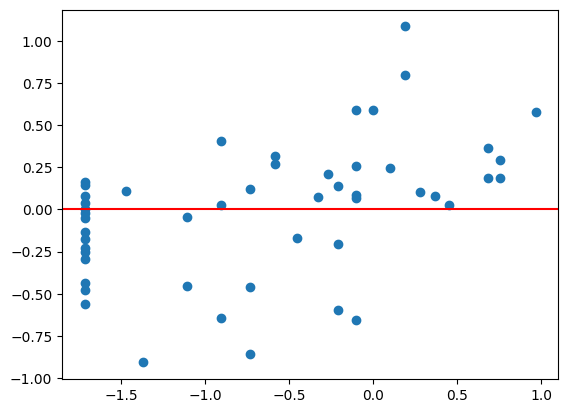

In [86]:
import matplotlib.pyplot as plt
plt.scatter(box_tr_y, resid_wit_int)
plt.axhline(y=0.0, color='r', linestyle='-')
plt.show()

In [ ]:
# The above plot show that the model is now balanced with equal number of observations above the zero line

In [70]:
""" Step 7: run a Weigthed Least Square model to minimize outlier and improve model performance with 
 box-cox tranformation of the target """

' Step 7: run a Weigthed Least Square model to minimize outlier and improve model performance with \n box-cox tranformation of the target '

In [83]:
# determing the w term for the WLS model using errors from step 6: w = 1/|e|
w = (1/np.abs(resid_wit_int)).tolist()


In [72]:
all_pc_int_sm.head()

,const,pc1,pc2,pc3,pc4,pc5,pc1pc2,pc1pc3
0,1.0,2.356080,1.431607,0.840887,-0.728768,0.837421,3.372982,1.981197
1,1.0,-1.253286,3.146455,-0.067260,0.704535,-0.176110,-3.943407,0.084296
2,1.0,-0.538300,-0.586635,-1.217110,0.152717,0.172251,0.315786,0.655171
3,1.0,-0.063336,-0.231863,-1.677547,0.198348,-0.066886,0.014685,0.106249
4,1.0,0.617935,-0.496733,-1.169869,0.261512,0.501977,-0.306949,-0.722903


In [84]:
# Fitting the WLS resgression model
wls_model = sm.WLS(box_tr_y,all_pc_int_sm, weights= w[0]).fit()
# Printing the parameters
wls_model.params

const    -0.656639
pc1       0.580018
pc2      -0.219849
pc3       0.107831
pc4       0.089139
pc5       0.044246
pc1pc2   -0.077458
pc1pc3   -0.204073
dtype: float64

In [85]:
wls_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:            Declination   R-squared:                       0.971
Model:                            WLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     204.3
Date:                Sat, 21 Jan 2023   Prob (F-statistic):           2.52e-30
Time:                        19:29:43   Log-Likelihood:                 2.0249
No. Observations:                  50   AIC:                             11.95
Df Residuals:                      42   BIC:                             27.25
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6566      0.029    -22.516      0.000      -0.715      -0.598
pc1            0.5800      0.022     25.933      0.000       0.535       0.625
pc2           -0.2198      0.032     -6.858      0.000      -0.285      -0.155
pc3            0.1078      0.041      2.608      0.013       0.024       0.191
pc4            0.0891      0.092      0.973      0.336      -0.096       0.274
pc5            0.0442      0.062      0.715      0.478      -0.081       0.169
pc1pc2        -0.0775      0.016     -4.886      0.000      -0.109      -0.045
pc1pc3        -0.2041      0.029     -6.928      0.000      -0.264      -0.145
==============================================================================
Omnibus:                        3.267   Durbin-Watson:                   1.728
Prob(Omnibus):                  0.195   Jarque-Bera (JB):                1.669
Skew:                          -0.080   Prob(JB):                        0.434
Kurtosis:                       2.119   Cond. No.                         13.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
"""Final step: Residual Analysis and Validation of the WLS Assumptions
"""
# Plot a QQ plot for WLS model evaluation

0.4460407258954864


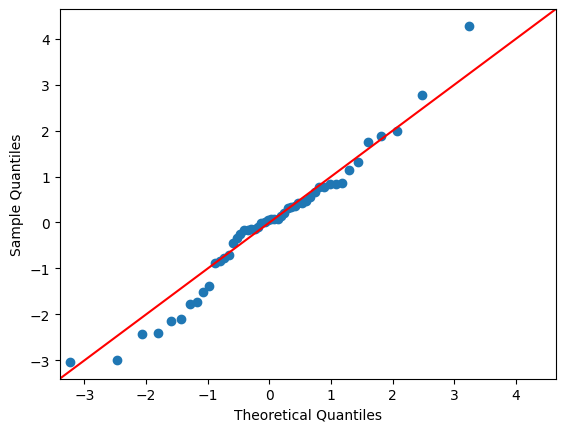

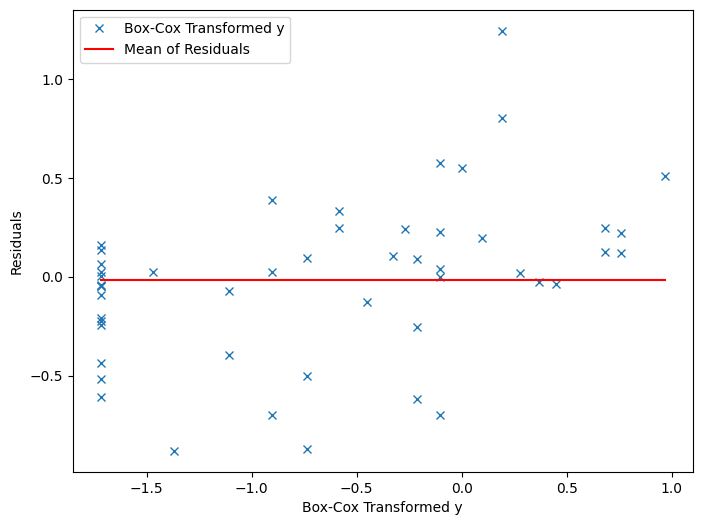

In [96]:
import scipy.stats as stats
fig = sm.qqplot(wls_model.resid, stats.t, fit=True, line="45")

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(box_tr_y, wls_model.resid, 'x', label="Box-Cox Transformed y")
ax.plot([np.min(box_tr_y),np.max(box_tr_y)],[np.mean(wls_model.resid),np.mean(wls_model.resid)], 'r',label='Mean of Residuals')
ax.set_xlabel('Box-Cox Transformed y')
ax.set_ylabel('Residuals')
legend = ax.legend(loc="best")
print(np.sqrt(np.sum(wls_model.resid**2)/41))

In [97]:
"""
After conducting the WLS, the outliers are already assumed to follow a normal distribution 
with higher variance. 
The final model(WLS) with interaction terms, box-cox transformation of the target significantly improved
the final model performance with R-squared and R-squared adjusted value of 97.1% and 96.7% respectively.
similar improvement can be observed comparing the AIC value of the initial model in step 3 (OLS) and that 
of the final model (WLS). 
"""

'\nAfter conducting the WLS, the outliers are already assumed to follow a normal distribution \nwith higher variance. \nThe final model(WLS) with interaction terms, box-cox transformation of the target significantly improved\nthe final model performance with R-squared and R-squared adjusted value of 97.1% and 96.7% respectively. \n'